In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import os

In [3]:
dataset_path = "E:\\mvtec_anomaly_detection_imagefolder\\test"
for class_folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, class_folder)
    print(f"Folder: {folder_path}")
    print("Contains:", os.listdir(folder_path))

Folder: E:\mvtec_anomaly_detection_imagefolder\test\bottle-broken_large
Contains: ['004.jpg', '006.jpg', '018.jpg']
Folder: E:\mvtec_anomaly_detection_imagefolder\test\bottle-broken_small
Contains: ['003.jpg', '004.jpg', '015.jpg']
Folder: E:\mvtec_anomaly_detection_imagefolder\test\bottle-contamination
Contains: ['001.jpg', '008.jpg', '011.jpg']
Folder: E:\mvtec_anomaly_detection_imagefolder\test\bottle-good
Contains: ['027.jpg', '031.jpg', '040.jpg', '059.jpg', '067.jpg', '080.jpg', '087.jpg', '090.jpg', '093.jpg', '094.jpg', '097.jpg', '099.jpg', '101.jpg', '104.jpg', '111.jpg', '114.jpg', '126.jpg', '129.jpg', '131.jpg', '147.jpg', '152.jpg', '158.jpg', '164.jpg', '174.jpg', '178.jpg', '185.jpg', '190.jpg', '195.jpg', '200.jpg', '209.jpg', '215.jpg', '220.jpg', '225.jpg', '226.jpg']
Folder: E:\mvtec_anomaly_detection_imagefolder\test\cable-bent_wire
Contains: ['004.jpg', '006.jpg', '009.jpg']
Folder: E:\mvtec_anomaly_detection_imagefolder\test\cable-cable_swap
Contains: ['007.jpg',

In [34]:
from PIL import Image

# 이미지 파일 경로
image_path = "E:\\mvtec_anomaly_detection_imagefolder\\test\\bottle-broken_large\\006.jpg"

# 이미지 불러오기
try:
    image = Image.open(image_path)
    print("Image loaded successfully.")
    image.show()  # 이미지 보기
except Exception as e:
    print(f"Error loading image: {e}")

Image loaded successfully.


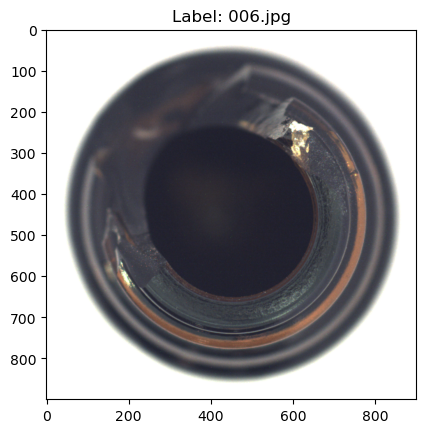

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 파일 경로
image_path = "E:\\mvtec_anomaly_detection_imagefolder\\test\\bottle-broken_large\\006.jpg"

# 이미지 불러오기
image = mpimg.imread(image_path)
# 이미지 이름 추출
image_name = os.path.basename(image_path)

# 이미지 시각화
plt.imshow(image)
plt.title(f"Label: {image_name}")
plt.show()


In [9]:
# 데이터셋 경로 설정
dataset_path = os.path.join("mvtec_anomaly_detection_imagefolder", "test")

# 이미지 변환 설정
transform = transforms.Compose([transforms.Resize((112, 112)),
                                transforms.ToTensor(),
                                # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet 데이터셋의 평균과 표준편차 사용
                                ])

# 데이터셋 로드
dataset = torchvision.datasets.ImageFolder(root=dataset_path, transform=transform)

# 데이터 로더 설정
batch_size = 16
test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [27]:
test_loader.dataset[0][0].shape

torch.Size([3, 112, 112])

In [12]:
test_loader.dataset[0]

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 3)

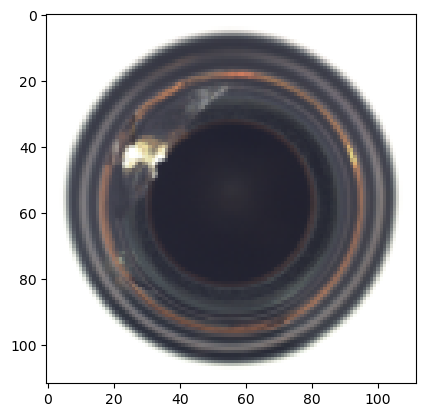

In [29]:
# import matplotlib.pyplot as plt
# import numpy as np

# # 텐서를 (높이, 너비, 채널)로 재정렬
# image_tensor = test_loader.dataset[0][0].permute(1, 2, 0)

# # 텐서를 NumPy 배열로 변환
# image_numpy = image_tensor.numpy()

# # 이미지 표시
# plt.imshow(image_numpy)
# plt.show()

Found 3 images in bottle-broken_large


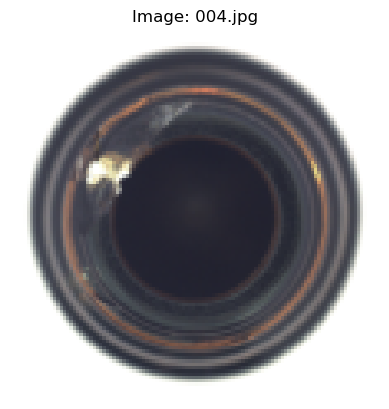

In [36]:
import os
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
dataset_path = "E:\\mvtec_anomaly_detection_imagefolder\\test"
class_folder = "bottle-broken_large"
folder_path = os.path.join(dataset_path, class_folder)

# 이미지 변환 설정
transform = transforms.Compose([
    transforms.Resize((112, 112)),
    transforms.ToTensor(),
])

# 폴더 내의 모든 이미지 파일 읽기
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
print(f"Found {len(image_files)} images in {class_folder}")

# 첫 번째 이미지 파일을 불러와 변환하고 시각화
if image_files:
    image_path = os.path.join(folder_path, image_files[0])
    image = Image.open(image_path)  # PIL 이미지로 불러오기
    image_tensor = transform(image)  # 텐서로 변환
    plt.imshow(image_tensor.permute(1, 2, 0))  # 차원 재배열 후 시각화
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.axis('off')  # 축 제거
    plt.show()
else:
    print("No images found in the directory.")


## 1. 레이블별 이미지 로드

Found 3 images in bottle-broken_large


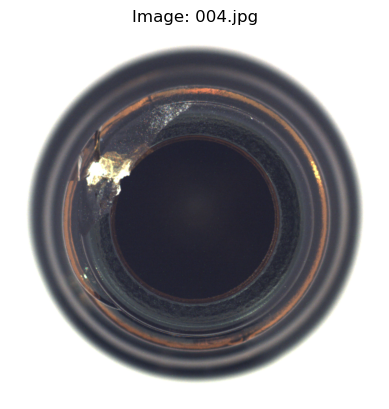

In [37]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
dataset_path = "E:\\mvtec_anomaly_detection_imagefolder\\test"
class_folder = "bottle-broken_large"
folder_path = os.path.join(dataset_path, class_folder)

# 폴더 내의 모든 이미지 파일 읽기
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
print(f"Found {len(image_files)} images in {class_folder}")

# 첫 번째 이미지 파일을 불러와 시각화
if image_files:
    image_path = os.path.join(folder_path, image_files[0])
    image = Image.open(image_path)  # PIL 이미지로 불러오기
    
    plt.imshow(image)  # PIL 이미지를 직접 사용하여 시각화
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.axis('off')  # 축 제거
    plt.show()
else:
    print("No images found in the directory.")


## 2. 레이블별 각 이미지 잘 맵핑하는지 확인 

In [38]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
dataset_path = "E:\\mvtec_anomaly_detection_imagefolder\\test"
class_folder = "bottle-broken_large"
folder_path = os.path.join(dataset_path, class_folder)

# 폴더 내의 모든 이미지 파일 읽기
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# 이미지 레이블 확인
expected_label = "bottle-broken_large"  # 예상 레이블
label_matches = True  # 모든 레이블이 일치하는지 여부

# 첫 번째 이미지 파일을 불러와 시각화 및 레이블 확인
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    label = os.path.basename(os.path.dirname(image_path))  # 현재 파일의 폴더명을 레이블로 사용
    
    if label != expected_label:
        label_matches = False
        break

print(f"All images are correctly labeled as '{expected_label}': {label_matches}")


All images are correctly labeled as 'bottle-broken_large': True


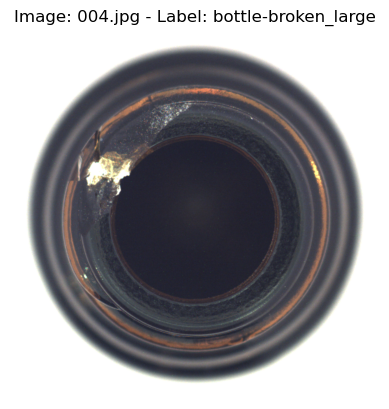

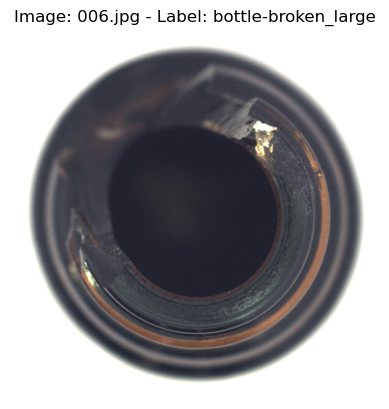

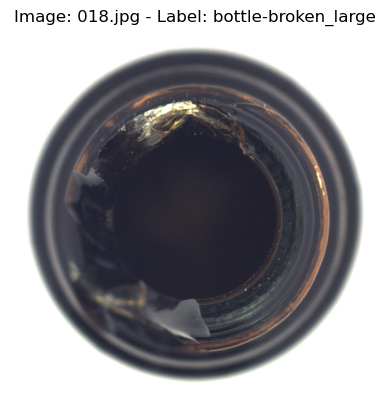

All images are correctly labeled as 'bottle-broken_large': True


In [39]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
dataset_path = "E:\\mvtec_anomaly_detection_imagefolder\\test"
class_folder = "bottle-broken_large"
folder_path = os.path.join(dataset_path, class_folder)

# 폴더 내의 모든 이미지 파일 읽기
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# 이미지 레이블 확인
expected_label = "bottle-broken_large"  # 예상 레이블
label_matches = True  # 모든 레이블이 일치하는지 여부

# 모든 이미지 파일을 불러와 시각화 및 레이블 확인
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)  # PIL 이미지로 불러오기
    label = os.path.basename(os.path.dirname(image_path))  # 현재 파일의 폴더명을 레이블로 사용
    
    # 이미지 시각화
    plt.imshow(image)
    plt.title(f"Image: {os.path.basename(image_path)} - Label: {label}")
    plt.axis('off')  # 축 제거
    plt.show()
    
    # 레이블 일치 확인
    if label != expected_label:
        label_matches = False

print(f"All images are correctly labeled as '{expected_label}': {label_matches}")


## 3. 모든 클래스 맵핑 확인(good 이미지는 x)

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 데이터셋 경로 설정
dataset_path = "E:\\mvtec_anomaly_detection_imagefolder\\test"

# 클래스 폴더 찾기
class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))] #and 'good' not in f]

# 각 클래스별 이미지 불러오기 및 레이블 확인
total_images = 0
correctly_labeled_count = 0

for class_folder in class_folders:
    folder_path = os.path.join(dataset_path, class_folder)
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)  # PIL 이미지로 불러오기
        label = os.path.basename(os.path.dirname(image_path))  # 현재 파일의 폴더명을 레이블로 사용

        # 이미지 시각화
        plt.imshow(image)
        plt.title(f"Image: {os.path.basename(image_path)} - Label: {label}")
        plt.axis('off')  # 축 제거
        plt.show()
        
        # 레이블 확인
        if label == class_folder:
            correctly_labeled_count += 1
        total_images += 1

# 레이블 정확도 계산
accuracy = correctly_labeled_count / total_images if total_images > 0 else 0
print(f"Labeling accuracy across all classes (excluding 'good'): {accuracy:.2%}")


In [5]:
import os
from PIL import Image as PILImage
from openpyxl import Workbook
from openpyxl.drawing.image import Image as OpenpyxlImage
from io import BytesIO

In [6]:
# 데이터셋 경로 설정
dataset_path = "E:\\mvtec_anomaly_detection_imagefolder\\test"

# 엑셀 워크북 생성
wb = Workbook()
ws = wb.active

# 헤더 행 추가
ws.append(['Class', 'File Name', 'Image'])

# 클래스 폴더 찾기
class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# 각 클래스별 이미지 불러오기 및 엑셀에 추가
for class_folder in class_folders:
    folder_path = os.path.join(dataset_path, class_folder)
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for image_file in image_files:
        # 현재 파일의 폴더명을 레이블로 사용
        label = os.path.basename(folder_path)
        # 이미지 파일의 전체 경로를 가져옴
        image_path = os.path.join(folder_path, image_file)
        
        # 이미지 크기 조정
        pil_image = PILImage.open(image_path)
        pil_image = pil_image.resize((128, 128), PILImage.Resampling.LANCZOS)  # 예시 크기, 필요에 따라 조정
        
        # BytesIO를 사용하여 메모리에 이미지를 임시 저장
        temp_image = BytesIO()
        pil_image.save(temp_image, format='PNG')
        temp_image.seek(0)

        # 엑셀에 행 추가
        ws.append([label, image_file])

        # 메모리에 저장된 이미지를 읽어서 엑셀에 추가
        excel_image = OpenpyxlImage(temp_image)
        ws.add_image(excel_image, f'C{ws._current_row}')

# 엑셀 파일로 저장
excel_path = "E:\\mvtec_anomaly_detection_imagefolder\\image_labels_with_images.xlsx"
wb.save(excel_path)

print(f"Data with images saved to {excel_path}")

Data with images saved to E:\mvtec_anomaly_detection_imagefolder\image_labels_with_images.xlsx
